In [ ]:
import uproot
file = uproot.open("ZH_HCC_ZLL_NanoV9_2017_867C.root")
file.classnames()

In [ ]:
tree = file["Events"]
tree.keys()

In [ ]:
branches = tree.arrays()
# print(len(branches))

Masking Muons

In [ ]:
# double_muon_mask = branches["nMuon"] > 1
# print(double_muon_mask)
# print(branches["nMuon"][double_muon_mask])

# import numpy as np
# np.sum(branches["nMuon"][double_muon_mask])

pt_mask = branches["Muon_pt"] > 25
eta_mask = abs(branches["Muon_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
pt_eta_mask = pt_mask & eta_mask
print(pt_eta_mask)

# muon_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
# print(muon_mask)
# muon_mask = [x > 1 for x in muon_mask]
# print(muon_mask)
muon_mask = [len(sublist) > 1 for sublist in branches["Muon_mass"][pt_eta_mask]]
print(muon_mask)

Finding the 4-Vector of Muons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][pt_eta_mask][muon_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][pt_eta_mask][muon_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][pt_eta_mask][muon_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][pt_eta_mask][muon_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][pt_eta_mask][muon_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][pt_eta_mask][muon_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][pt_eta_mask][muon_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][pt_eta_mask][muon_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

Invariant Mass of Z boson

In [ ]:
plt.hist(M.m, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (0, 300))
plt.xlabel("Z boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of Z boson

In [ ]:
plt.hist(M.p_t, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (-50, 700))
plt.xlabel("Z boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()

pt, eta, phi of Jets

In [ ]:
# pt = []
# eta = []
# phi = []

# for i in range(0, len(branches)):
#     # if i < 10:
#     #     print(i)
#     #     print("nMuon = ", branches["nMuon"][i], len(branches["Muon_pt"][i]))
#     #     print(branches["Jet_pt"][i])

#     # for j in range(0, branches["nMuon"][i]):
#     #     if i < 10:
#     #         print(branches["Muon_pt"][i][j])

#     for j in range(0, len(branches["Jet_pt"][i])):
#         # if i < 10:
#         pt.append(branches["Jet_pt"][i][j])

#     for k in range(0, len(branches["Jet_eta"][i])):
#         eta.append(branches["Jet_eta"][i][k])

#     for l in range(0, len(branches["Jet_phi"][i])):
#         phi.append(branches["Jet_phi"][i][l])

# plt.hist(pt, bins = 50, range = (0, 200))
# plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")
# plt.ylabel("Number of jets")
# plt.show()

# plt.hist(eta, bins = 100, range = (-5, 5))
# plt.xlabel("Jet $\eta$ [rad]")
# plt.ylabel("Number of jets")
# plt.show()

# plt.hist(phi, bins = 100, range = (-5, 5))
# plt.xlabel("Jet $\phi$ [rad]")
# plt.ylabel("Number of jets")
# plt.show()

Masking Jets

In [ ]:
# double_jet_mask = branches["nJet"] > 1
# print(double_jet_mask)
# print(branches["nJet"][double_jet_mask])

pt_mask = branches["Jet_pt"] > 25
eta_mask = abs(branches["Jet_eta"]) < 2.4
jet_hadronflavour_mask = abs(branches["Jet_hadronFlavour"]) == 4
pt_eta_mask = pt_mask & eta_mask & jet_hadronflavour_mask
print(pt_eta_mask)

# jet_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
# print(jet_mask)
# jet_mask = [x > 1 for x in jet_mask]
jet_mask = [len(sublist) > 1 for sublist in branches["Jet_mass"][pt_eta_mask]]
print(jet_mask)

In [ ]:
combined_mask = np.logical_and(jet_mask, muon_mask)

momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

for i in momentum:
    for j in range(0, 2):
        print(f"{i}{j + 1} = ", [sublist[j] for sublist in branches[i][pt_eta_mask][combined_mask]])

Finding the 4-Vector of Jets

In [ ]:
Jet1_mass = np.array([sublist[0] for sublist in branches["Jet_mass"][pt_eta_mask][combined_mask]])
Jet1_eta = np.array([sublist[0] for sublist in branches["Jet_eta"][pt_eta_mask][combined_mask]])
Jet1_phi = np.array([sublist[0] for sublist in branches["Jet_phi"][pt_eta_mask][combined_mask]])
Jet1_pt = np.array([sublist[0] for sublist in branches["Jet_pt"][pt_eta_mask][combined_mask]])

Jet2_mass = np.array([sublist[1] for sublist in branches["Jet_mass"][pt_eta_mask][combined_mask]])
Jet2_eta = np.array([sublist[1] for sublist in branches["Jet_eta"][pt_eta_mask][combined_mask]])
Jet2_phi = np.array([sublist[1] for sublist in branches["Jet_phi"][pt_eta_mask][combined_mask]])
Jet2_pt = np.array([sublist[1] for sublist in branches["Jet_pt"][pt_eta_mask][combined_mask]])

Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass, Jet1_eta, Jet1_phi, Jet1_pt)
Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass, Jet2_eta, Jet2_phi, Jet2_pt)

M = Jet1 + Jet2
print(M.m)
len(M.m)

Invariant Mass of H boson

In [ ]:
plt.hist(M.m, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 700))
plt.xlabel("H boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of H boson

In [ ]:
plt.hist(M.p_t, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 500))
plt.xlabel("H boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()

In [ ]:
pt_mask = branches["Muon_pt"] > 25
eta_mask = abs(branches["Muon_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
pt_eta_mask = pt_mask & eta_mask
print(pt_eta_mask)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][pt_eta_mask][combined_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][pt_eta_mask][combined_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][pt_eta_mask][combined_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][pt_eta_mask][combined_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][pt_eta_mask][combined_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][pt_eta_mask][combined_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][pt_eta_mask][combined_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][pt_eta_mask][combined_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

Kinematic Fit

Trial 1

In [ ]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

parameters = torch.tensor([Muon1_pt[0], Muon2_pt[0], 
                           Jet1_pt[0], Jet2_pt[0], 
                           Muon1_phi[0], Muon2_phi[0],
                           Jet1_phi[0], Jet2_phi[0],
                           Muon1_eta[0], Muon2_eta[0]], dtype=torch.float64)

def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass - mass_z

    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

# Define the smearing values
smear_values = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# The covariance matrix initialization
n_params = 10
covariance_matrix = torch.zeros(n_params, n_params)
for i in range(n_params-1):
    covariance_matrix[i, i] = smear_values[i]**2

# Kinematic Fitter Initialization
fitter = KinematicFitter(n_constraints=3, n_parameters=10)
fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))

Trial 2

In [ ]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

parameters = torch.tensor([Muon1_pt[0], Muon2_pt[0], 
                           Jet1_pt[0], Jet2_pt[0], 
                           Muon1_phi[0], Muon2_phi[0],
                           Jet1_phi[0], Jet2_phi[0],
                           Muon1_eta[0], Muon2_eta[0]], dtype=torch.float64)

# Calculate invariant mass
def invariant_mass(params: torch.Tensor) -> torch.Tensor:

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)   
   
    return invariant_mass

def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass(params) - mass_z

    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

# Define the smearing values
smear_values = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# The covariance matrix initialization
n_params = 10
covariance_matrix = torch.zeros(n_params, n_params)
for i in range(n_params-1):
    covariance_matrix[i, i] = smear_values[i]**2

# Kinematic Fitter Initialization
fitter = KinematicFitter(n_constraints=3, n_parameters=10)
fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))

Finding Invariant Mass of Jets with Fitted Parameters

In [ ]:
# generic imports
import sys
import argparse
import numpy as np
from tqdm.auto import tqdm
from array import array

# ROOT imports
import ROOT

# torch imports
import torch

# framework imports
from kinematic_fitter import KinematicFitter

zero1 = []
zero2 = []
zero3 = []
def constraint_equations(params: torch.Tensor) -> torch.Tensor:
    # Constant parameters
    mass_z = torch.tensor(91.2).double()

    px1 = params[0]*torch.cos(params[4])
    px2 = params[1]*torch.cos(params[5])

    py1 = params[0]*torch.sin(params[4])
    py2 = params[1]*torch.sin(params[5])

    pz1 = params[0]*torch.sinh(params[8])
    pz2 = params[1]*torch.sinh(params[9])
                    
    # Calculate energy for muon 1
    E1 = torch.sqrt(px1**2 + py1**2 + pz1**2 + 0.106**2)
    # Calculate energy for muon 2
    E2 = torch.sqrt(px2**2 + py2**2 + pz2**2 + 0.106**2)
    # Calculate invariant mass
    invariant_mass_squared = (E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    invariant_mass = torch.sqrt(invariant_mass_squared)

    # Calculate constraint equations
    constraint1 = params[0]*torch.cos(params[4]) + params[1]*torch.cos(params[5]) + params[2]*torch.cos(params[6]) + params[3]*torch.cos(params[7])
    constraint2 = params[0]*torch.sin(params[4]) + params[1]*torch.sin(params[5]) + params[2]*torch.sin(params[6]) + params[3]*torch.sin(params[7])
    constraint3 = invariant_mass - mass_z

    zero1.append(torch.tensor(constraint1))
    zero2.append(torch.tensor(constraint2))
    zero3.append(torch.tensor(constraint3))
    
    # Combine constraint equations into a single tensor
    constraints = torch.stack([constraint1, constraint2, constraint3])
    # print(constraints)
    return constraints

m_cc = []

# Maximum number of iterations for fitting
max_iterations = 10

for i in range(len((Jet1 + Jet2).m)):
    parameters = torch.tensor([Muon1_pt[i], Muon2_pt[i], 
                               Jet1_pt[i], Jet2_pt[i], 
                               Muon1_phi[i], Muon2_phi[i],
                               Jet1_phi[i], Jet2_phi[i],
                               Muon1_eta[i], Muon2_eta[i]], dtype=torch.float64)

    # Define the smearing values
    smear_values = [0.05*Muon1_pt[i], 0.05*Muon2_pt[i], 0.15*Jet1_pt[i], 0.15*Jet2_pt[i], 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

    # The covariance matrix initialization
    n_params = 10
    covariance_matrix = torch.zeros(n_params, n_params)
    for j in range(n_params):
        covariance_matrix[j, j] = smear_values[j]**2
    
    # Kinematic Fitter Initialization
    fitter = KinematicFitter(n_constraints=3, n_parameters=10, n_iterations=max_iterations)
    fitter.set_covariance_matrix(cov_matrix=covariance_matrix)
    ok = fitter.fit(measured_params=parameters, constraints=lambda parameters: constraint_equations(parameters))
    
    fitted_params = torch.tensor(fitter.get_fitted_measured_params(), dtype=torch.float64)
    # print(fitted_params[3])
    fitted_Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass[i], Jet1_eta[i], fitted_params[6], fitted_params[2])
    fitted_Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass[i], Jet2_eta[i], fitted_params[7], fitted_params[3])
    
    M = fitted_Jet1 + fitted_Jet2
    m_cc.append(M.m)

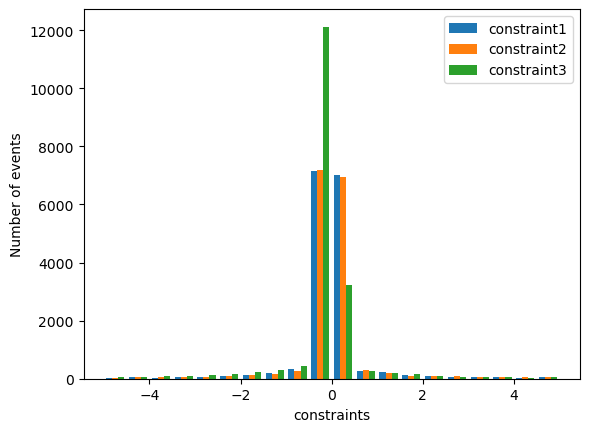

In [60]:
plt.hist([zero1, zero2, zero3], label = ["constraint1", "constraint2", "constraint3"], bins = 20, range = (-5, 5))
plt.xlabel("constraints")
plt.ylabel("Number of events")
plt.legend()
plt.show()

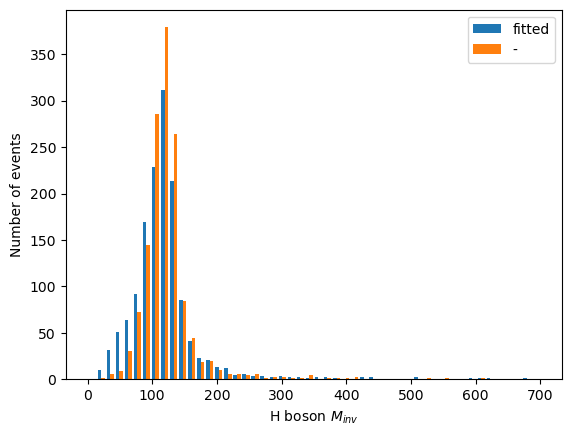

In [61]:
plt.hist([m_cc, (Jet1 + Jet2).m], label = ["fitted", "-"], bins = 50, range = (0, 700))
plt.xlabel("H boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()